In [60]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [61]:
df = pd.read_csv("train.csv")

In [62]:
print(df.shape)
print(df.head())
print(df.info())

(12463, 12)
  POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE                      ADDRESS  LONGITUDE   LATITUDE  \
0              1       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2              1       1             Jigani,Bangalore  12.778033  77.632191   
3              1       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4              0       1             New Town,Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0                   55.0  
1                   

In [63]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
12458,Dealer,0,1,3,BHK,1345.154387,1,1,"Shankar Kalat Nagar,Pune",19.957301,73.839897,88.0
12459,Dealer,1,0,1,BHK,425.019031,0,1,"Andheri (West),Maharashtra",19.139348,72.820458,67.0
12460,Owner,0,0,2,BHK,8723.404255,1,1,"Rampuri,Ghaziabad",28.671102,77.329251,41.0
12461,Dealer,0,0,1,BHK,560.014934,1,1,"Sector 15 Kharghar,Maharashtra",19.040416,73.078151,60.0


In [64]:
unique_values = df['POSTED_BY'].unique()
unique_values

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12463 entries, 0 to 12462
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              12463 non-null  object 
 1   UNDER_CONSTRUCTION     12463 non-null  int64  
 2   RERA                   12463 non-null  int64  
 3   BHK_NO.                12463 non-null  int64  
 4   BHK_OR_RK              12463 non-null  object 
 5   SQUARE_FT              12463 non-null  float64
 6   READY_TO_MOVE          12463 non-null  int64  
 7   RESALE                 12463 non-null  int64  
 8   ADDRESS                12463 non-null  object 
 9   LONGITUDE              12463 non-null  float64
 10  LATITUDE               12462 non-null  float64
 11  TARGET(PRICE_IN_LACS)  12462 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [66]:
df.isnull().sum(0)

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 1
TARGET(PRICE_IN_LACS)    1
dtype: int64

Lets replace the null psaces with median of teh respective coloumns

In [68]:
median_value = df['LATITUDE'].median()

df['LATITUDE'].fillna(median_value, inplace=True)

In [71]:
medianvalue = df['TARGET(PRICE_IN_LACS)'].median()

df['TARGET(PRICE_IN_LACS)'].fillna(medianvalue, inplace=True)

In [72]:
df.isnull().sum(0)

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [73]:
print(df.describe())


       UNDER_CONSTRUCTION          RERA       BHK_NO.     SQUARE_FT  \
count        12463.000000  12463.000000  12463.000000  1.246300e+04   
mean             0.184145      0.319024      2.382091  3.734933e+04   
std              0.387618      0.466117      0.855209  2.831791e+06   
min              0.000000      0.000000      1.000000  3.000000e+00   
25%              0.000000      0.000000      2.000000  8.966801e+02   
50%              0.000000      0.000000      2.000000  1.170095e+03   
75%              0.000000      1.000000      3.000000  1.550000e+03   
max              1.000000      1.000000     20.000000  2.545455e+08   

       READY_TO_MOVE        RESALE     LONGITUDE      LATITUDE  \
count   12463.000000  12463.000000  12463.000000  12463.000000   
mean        0.815855      0.930354     21.290693     76.811788   
std         0.387618      0.254560      6.148315     10.712394   
min         0.000000      0.000000     -6.240302   -117.001699   
25%         1.000000      1.00

<ipython-input-74-d41c670d8d84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


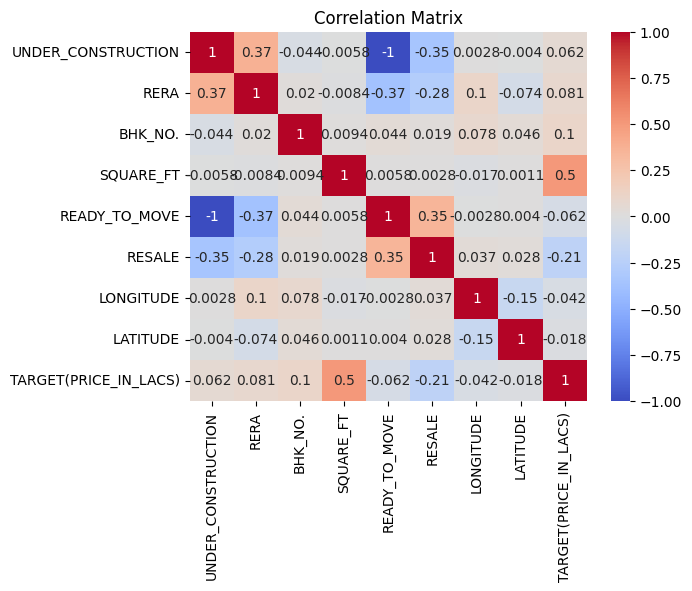

In [74]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

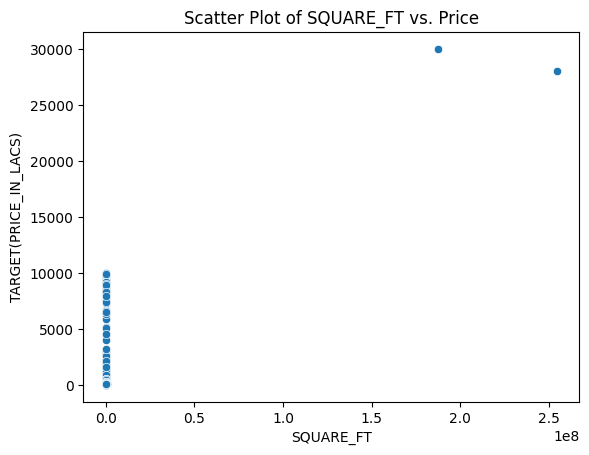

In [75]:
sns.scatterplot(x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)', data=df)
plt.title('Scatter Plot of SQUARE_FT vs. Price')
plt.show()

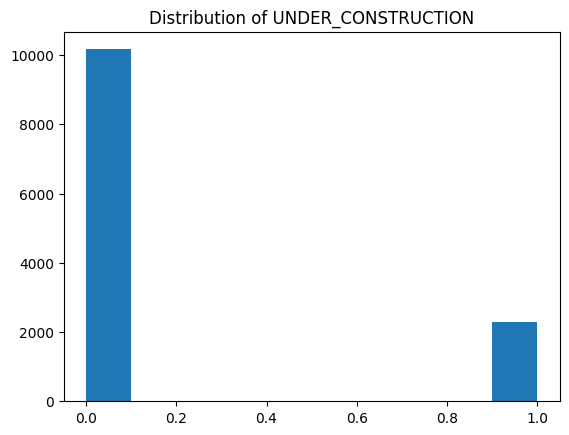

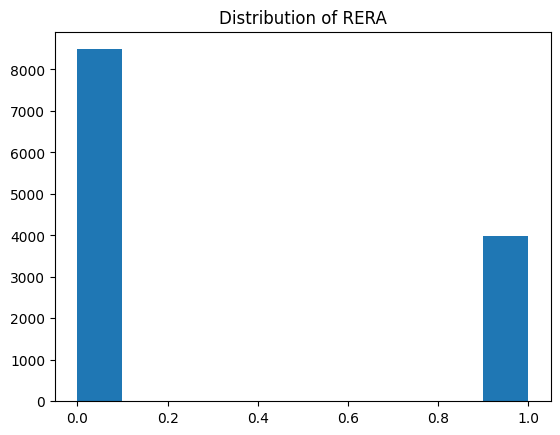

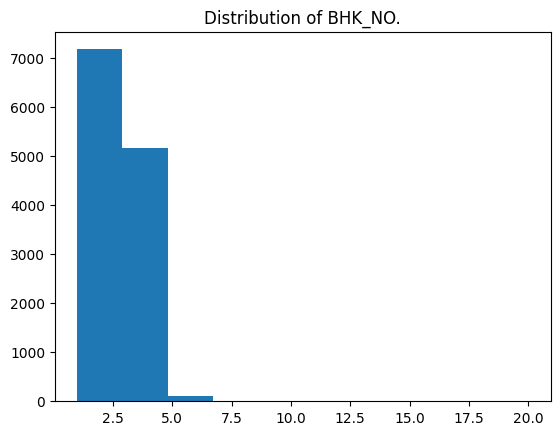

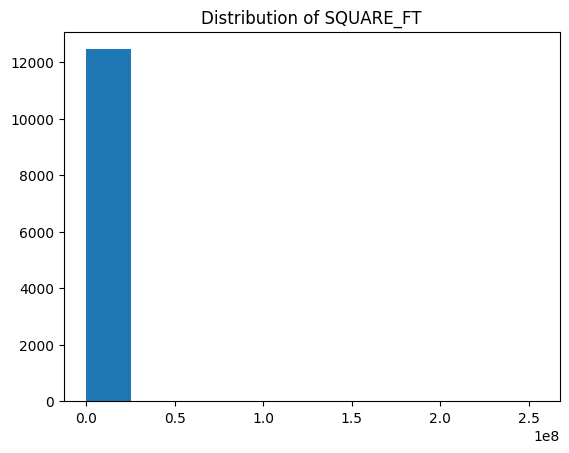

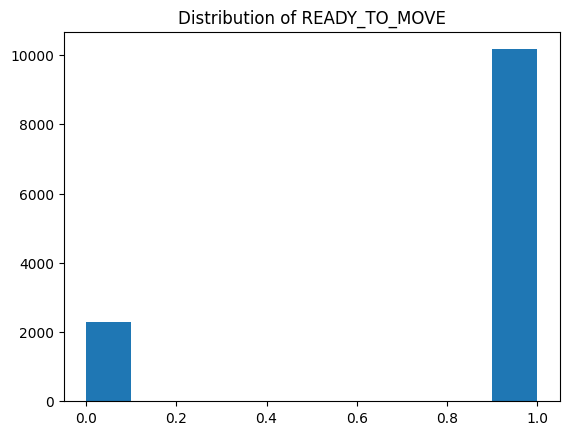

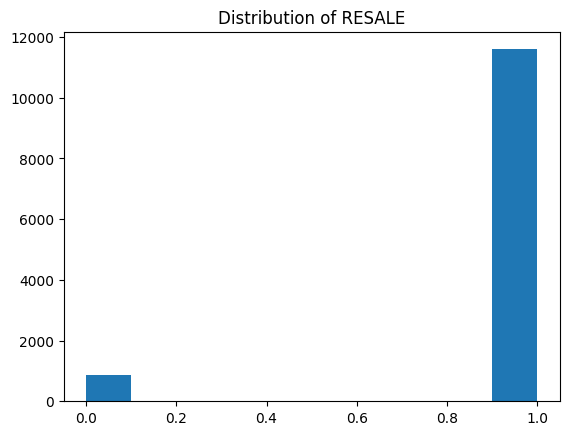

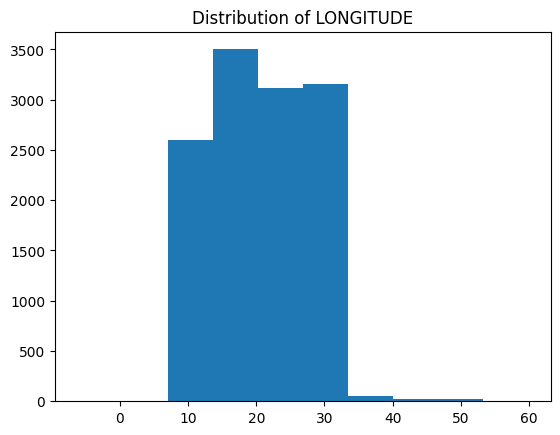

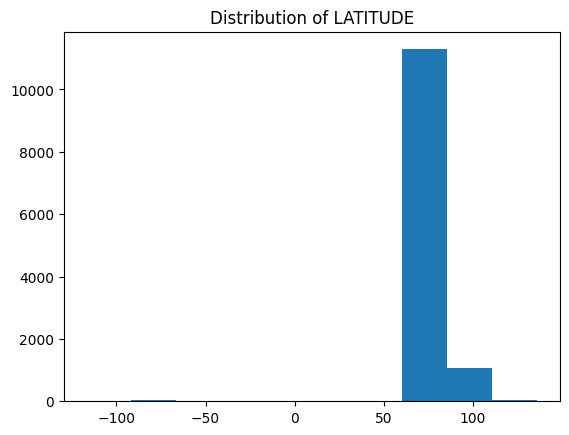

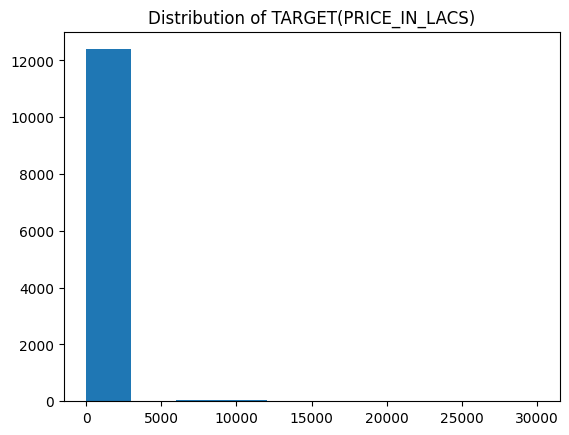

In [76]:
numerical_columns = df.select_dtypes(include=[np.number])
for col in numerical_columns:
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


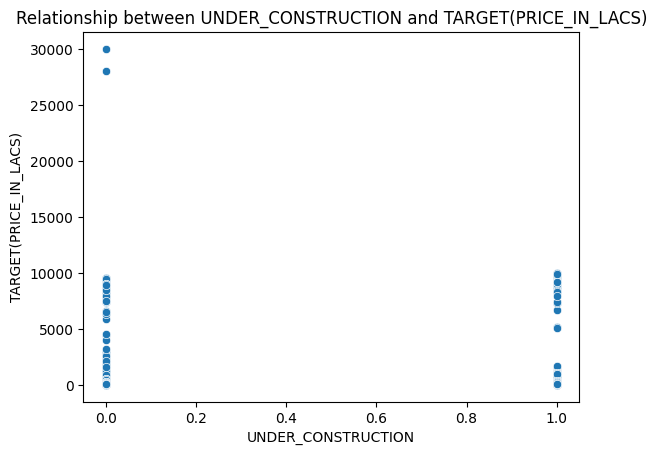

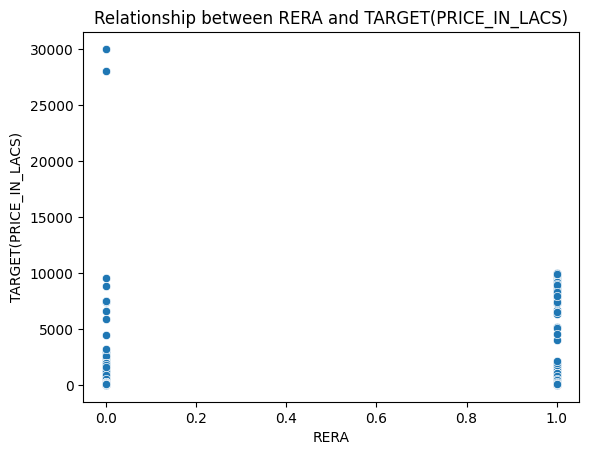

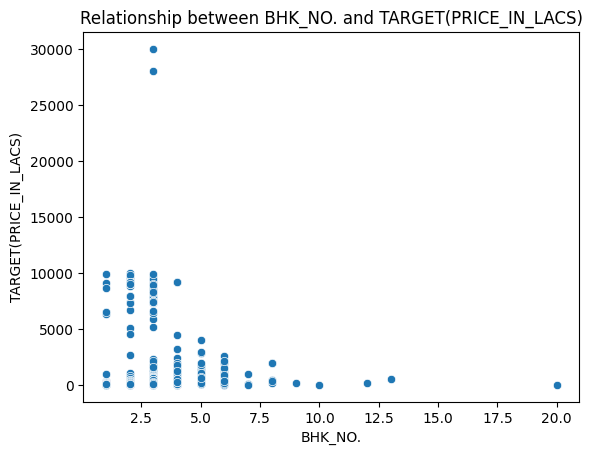

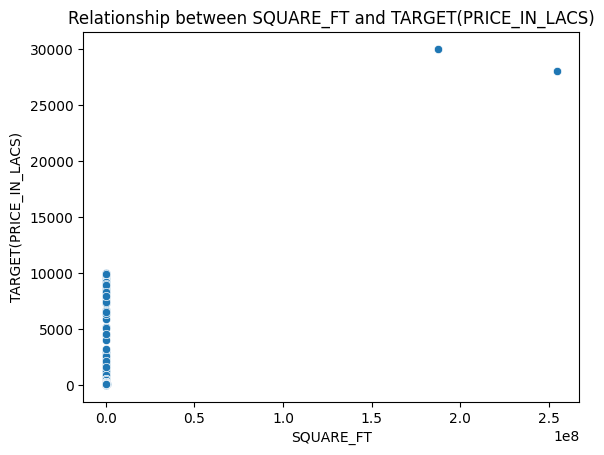

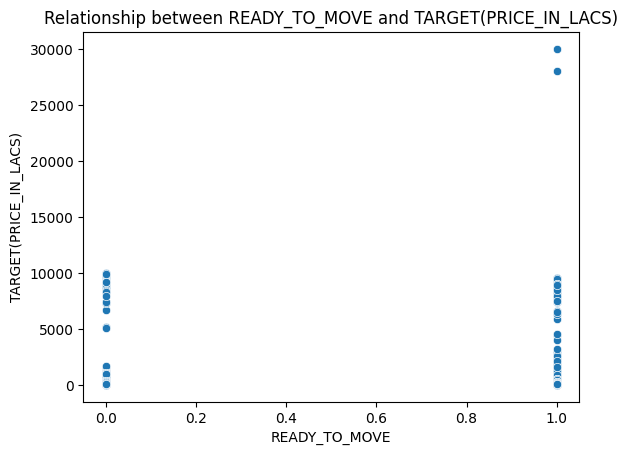

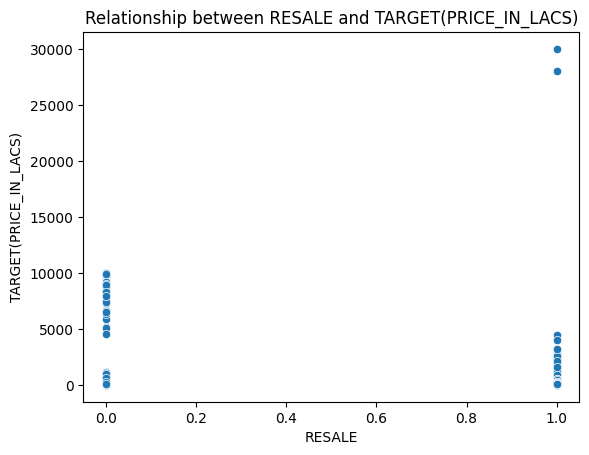

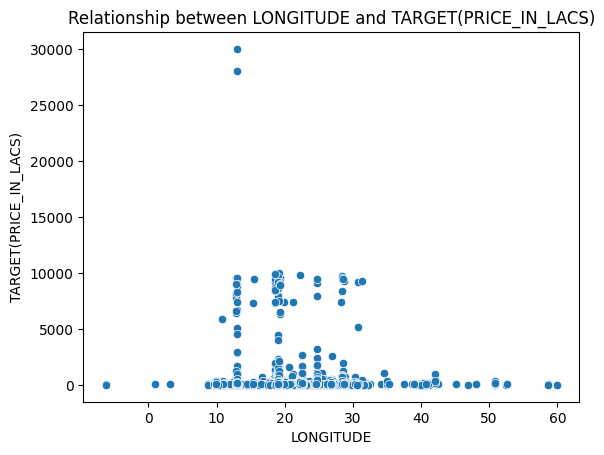

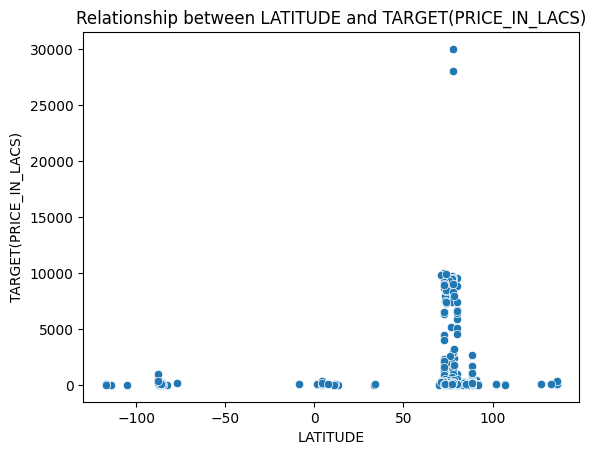

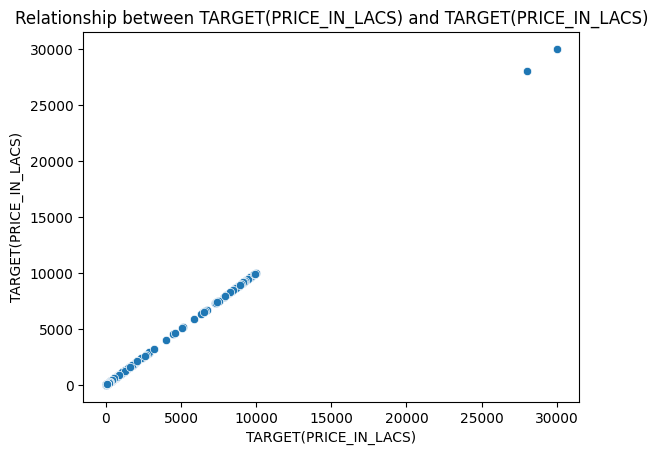

In [77]:
for col in numerical_columns:
    sns.scatterplot(x=col, y='TARGET(PRICE_IN_LACS)', data=df)
    plt.title(f'Relationship between {col} and TARGET(PRICE_IN_LACS)')
    plt.show()

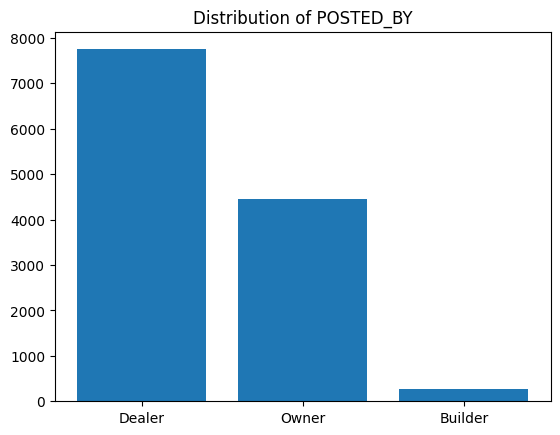

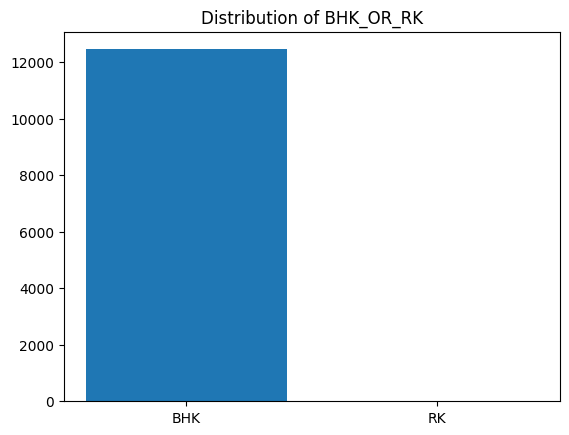

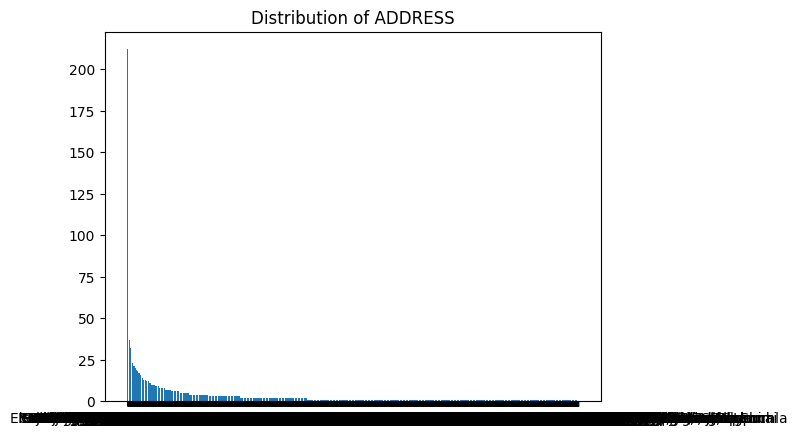

In [78]:
categorical_columns = df.select_dtypes(include=[object])
for col in categorical_columns:
    plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.title(f'Distribution of {col}')
    plt.show()

In [79]:
df['BHK_OR_RK'] = df['BHK_OR_RK'].replace('BHK', 0)
df['BHK_OR_RK'] = df['BHK_OR_RK'].replace('RK', 1)

In [80]:
df['POSTED_BY'] = df['POSTED_BY'].replace('Owner', 0)
df['POSTED_BY'] = df['POSTED_BY'].replace('Dealer', 1)
df['POSTED_BY'] = df['POSTED_BY'].replace('Builder', 2)

In [88]:
df = df.drop('ADDRESS', axis = 1)

In [89]:
x = df.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = df['TARGET(PRICE_IN_LACS)']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [91]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(x_test)
y_pred

array([309.40868675, 137.62644531,  82.19785057, ..., 178.92380536,
       -34.94824676, -44.28522524])

In [94]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean squared error (MSE):', mse)
print('Root mean squared error (RMSE):', rmse)
print('R-squared:', r2)

Mean squared error (MSE): 313340.83307284437
Root mean squared error (RMSE): 559.7685531296345
R-squared: 0.5227235247369779
